#  Deep Learning With PyTorch 13 - Feed-Forward Neural Net

Implement multi-layer neural network with MNIST

In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [2]:
# device config
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# hyper parameters
input_size = 784 # 28x28
hidden_size = 100
num_classes = 10

num_epochs = 2
batch_size = 100
learning_rate = 0.001

In [8]:
# MNIST
train_dataset = torchvision.datasets.MNIST(root="./data/", train=True, download=False,
                                             transform=transforms.ToTensor())
test_dataset = torchvision.datasets.MNIST(root="./data/", train=False, download=False,
                                             transform=transforms.ToTensor())

In [9]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size,
                                           shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size,
                                           shuffle=False)

In [10]:
examples = iter(train_loader)
samples, labels = examples.next()
print(samples.shape, labels.shape)

torch.Size([100, 1, 28, 28]) torch.Size([100])


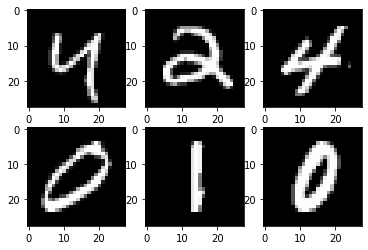

In [12]:
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(samples[i][0], cmap="gray")

Set up a fully connected network

In [13]:
class NeuralNet(nn.Module):
    
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)
        
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        return out

In [14]:
model = NeuralNet(input_size, hidden_size, num_classes)

Loss and optimizer

In [16]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

Training loop

In [18]:
n_total_steps = len(train_loader)

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # 100, 1, 28, 28
        # 100, 784
        # put -1 in first dimension so pytorch will figure it out for us
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # forward
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print(f"epoch {epoch+1} / {num_epochs}, step {i+1}/{n_total_steps}, loss = {loss.item():.4f}")

epoch 1 / 2, step 100/600, loss = 0.0683
epoch 1 / 2, step 200/600, loss = 0.1377
epoch 1 / 2, step 300/600, loss = 0.2290
epoch 1 / 2, step 400/600, loss = 0.1725
epoch 1 / 2, step 500/600, loss = 0.1351
epoch 1 / 2, step 600/600, loss = 0.0833
epoch 2 / 2, step 100/600, loss = 0.1287
epoch 2 / 2, step 200/600, loss = 0.1218
epoch 2 / 2, step 300/600, loss = 0.1086
epoch 2 / 2, step 400/600, loss = 0.0278
epoch 2 / 2, step 500/600, loss = 0.0485
epoch 2 / 2, step 600/600, loss = 0.1108


test

In [20]:
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        
        # value, index
        _, predictions = torch.max(outputs, 1)
        n_samples += labels.shape[0]
        n_correct += (predictions == labels).sum().item()
        
    acc = 100.0 * (n_correct / n_samples)
    print(f"accuracy = {acc}")

accuracy = 97.15
